# Change Directory to import image_utils library

In [15]:
import os
os.chdir('D:\semantic segmentation\Building-Footprint-Extraction-Practical-Project-develop\Building-Footprint-Extraction-Practical-Project-develop')

# Import Libraries and Modules

In [14]:
import tifffile as tfl
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import image_utils

# Read Image

In [22]:
# in case error occurs
# PIL.Image.MAX_IMAGE_PIXELS = 441711756

# read image
#img_ori_dir = 'my_image.tif'
img_ori_dir= r'D:\semantic segmentation\1.Annotate\0.Datasets\Clip_final_hlaing_thar_yar1.tif'
#img_ori_dir= r'D:/semantic segmentation/2.Image part/Binary Mask/binary_mask - Copy.tif'

img_ori = tfl.imread(img_ori_dir)

print(img_ori.shape)

(2631, 3735, 3)


In [24]:
# original image height and width
ori_height = img_ori.shape[0]
ori_width = img_ori.shape[1]
print("height : ",ori_height)
print("width : ",ori_width)
print(type(img_ori))

height :  2631
width :  3735
<class 'numpy.ndarray'>


# Rescale Image
- calculate new resized image size(height and width)

In [25]:
# Scale
# percentage to shrink or enlarge image
percent = 0.68

# target tile size
img_size = 512

# calculate target image height and width
new_height = int(ori_height * percent)
new_width = int(ori_width * percent)

print(new_height, new_width)

1789 2539


# Resize image and visualize 
- only include RGB channel, discard the 4th one if exists
- best interpolation methods for image resizing
    - Enlarge: INTER_LINEAR or INTER_CUBIC
    - Shrink: INTER_AREA

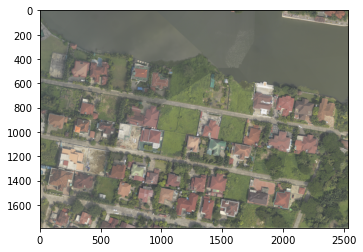

In [26]:
img = cv2.resize(img_ori, (new_width , new_height))[:,:,:]
plt.imshow(img)

# Visualize a sample tile
- if we do not like the scale, we can go back up and change scale

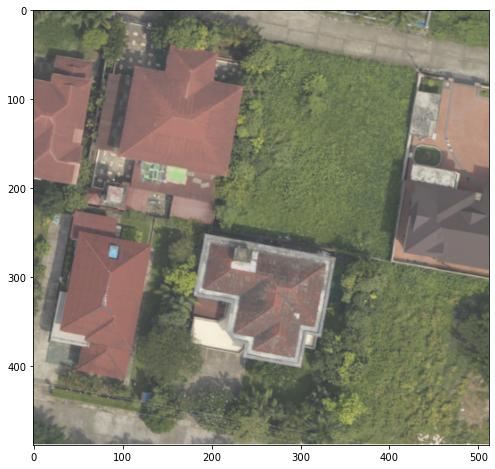

In [27]:
# x and y coordinates to plot
x = 1300
y = 1300

fig, ax1 = plt.subplots(1,1, figsize=(13, 8))
ax1.imshow(img[y : y+img_size, x : x+img_size])

# Pad and Crop

In [28]:
import image_utils as ps

# pad the image according to model input size
padded = ps.pad(img, img_size, img_size)

# crop image into tiles
cropped = ps.crop(padded, img_size, img_size)

print('Number of Tiles :', len(cropped))

image width =  2539 , image height =  1789
pad width =  21 , pad height =  259
Number of Tiles : 20


# Save tiles in target directory

In [37]:
save_dir = r'D:\semantic segmentation\2.Image part\Processed Image/'
area_name = 'processed_image+final'

In [38]:
def get_img_name(area_name, idx, num_digit, angle):
    num_zeros = num_digit - len(str(idx))
    zeros = ''
    for i in range(num_zeros): zeros+='0'
    return area_name + '_' + zeros + str(idx) + '_' + 'a' + str(angle)

img_format = 'png'
num_digit = 5
index = 1
rotations = [0]

# save all images from list of cropped tiles
for tile in cropped:
    for angle in rotations:
        
        # rotate image
        rotated_tile = tile.rotate(angle)
        
        # get image name format
        img_name = get_img_name(area_name, index, num_digit, angle)
        
        # save image
        rotated_tile.save(save_dir+'{}.{}'.format(img_name, img_format))
        
        print(save_dir+'{}.{}'.format(img_name, img_format))
        
    index += 1

D:\semantic segmentation\2.Image part\Processed Image/processed_image+final_00001_a0.png
D:\semantic segmentation\2.Image part\Processed Image/processed_image+final_00002_a0.png
D:\semantic segmentation\2.Image part\Processed Image/processed_image+final_00003_a0.png
D:\semantic segmentation\2.Image part\Processed Image/processed_image+final_00004_a0.png
D:\semantic segmentation\2.Image part\Processed Image/processed_image+final_00005_a0.png
D:\semantic segmentation\2.Image part\Processed Image/processed_image+final_00006_a0.png
D:\semantic segmentation\2.Image part\Processed Image/processed_image+final_00007_a0.png
D:\semantic segmentation\2.Image part\Processed Image/processed_image+final_00008_a0.png
D:\semantic segmentation\2.Image part\Processed Image/processed_image+final_00009_a0.png
D:\semantic segmentation\2.Image part\Processed Image/processed_image+final_00010_a0.png
D:\semantic segmentation\2.Image part\Processed Image/processed_image+final_00011_a0.png
D:\semantic segmentat

# ***Reading Binary Image***

In [40]:
from PIL import Image
from numpy import asarray
im = Image.open(r'D:\semantic segmentation\1.Annotate\0.Datasets\binary_mask\label.png')
data = asarray(im)

**Printing out cell values and shape of data**

In [41]:
print("cell values ", np.unique(data))
print("data shape: ", data.shape)

cell values  [0 1]
data shape:  (2631, 3735)


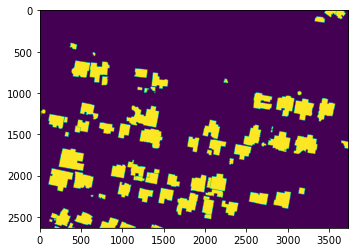

In [42]:
plt.imshow(data)

In [43]:
# original image height and width
binary_ori_height = data.shape[0]
binary_ori_width = data.shape[1]
print("height : ",binary_ori_height)
print("width : ",binary_ori_width)

height :  2631
width :  3735


# Rescale Image
- calculate new resized image size(height and width)

In [44]:
# Scale
# percentage to shrink or enlarge image
percent = 0.68

# target tile size
img_size = 512

# calculate target image height and width
binary_new_height = int(binary_ori_height * percent)
binary_new_width = int(binary_ori_width * percent)

print(binary_new_height, binary_new_width)

1789 2539


# Resize image and visualize 
- only include RGB channel, discard the 4th one if exists
- best interpolation methods for image resizing
    - Enlarge: INTER_LINEAR or INTER_CUBIC
    - Shrink: INTER_AREA

(1789, 2539)


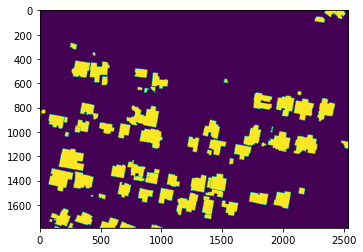

In [45]:
binary_data = cv2.resize(data, (binary_new_width , binary_new_height))[:]
plt.imshow(binary_data)
print(binary_data.shape)

# Visualize a sample tile
- if we do not like the scale, we can go back up and change scale

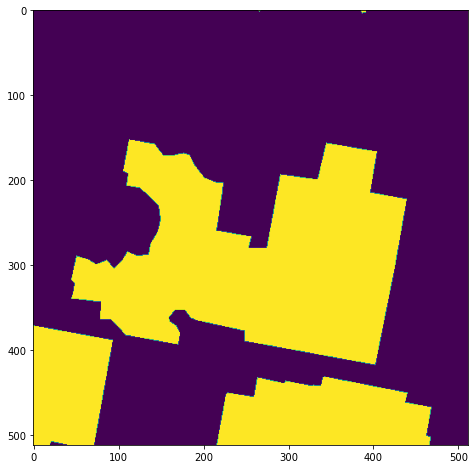

In [46]:
# x and y coordinates to plot
x = 1000
y = 1000

fig, ax1 = plt.subplots(1,1, figsize=(13, 8))
ax1.imshow(data[y : y+img_size, x : x+img_size])

# Pad and Crop

In [47]:
import image_utils as ps

# pad the image according to model input size
padded = ps.pad(binary_data, img_size, img_size)

# crop image into tiles
cropped = ps.crop(padded, img_size, img_size)

print('Number of Tiles :', len(cropped))

image width =  2539 , image height =  1789
pad width =  21 , pad height =  259
Number of Tiles : 20


# Save tiles in target directory

In [60]:
save_dir =r'D:\semantic segmentation\2.Image part\Binary Mask/'

area_name = 'mask'

In [61]:
def get_img_name(area_name, idx, num_digit, angle):
    num_zeros = num_digit - len(str(idx))
    zeros = ''
    for i in range(num_zeros): zeros+='0'
    return area_name + '_' + zeros + str(idx) + '_' + 'a' + str(angle)

img_format = 'png'
num_digit = 5
index = 1
rotations = [0]

# save all images from list of cropped tiles
for tile in cropped:
        
        # rotate image
        rotated_tile = tile.rotate(angle)
        
        # get image name format
        img_name = get_img_name(area_name, index, num_digit, angle)
        
        # save image
        rotated_tile.save(save_dir+'{}.{}'.format(img_name, img_format))
        
        print(save_dir+'{}.{}'.format(img_name, img_format))
        
        index += 1

D:\semantic segmentation\2.Image part\Binary Mask/mask_00001_a0.png
D:\semantic segmentation\2.Image part\Binary Mask/mask_00002_a0.png
D:\semantic segmentation\2.Image part\Binary Mask/mask_00003_a0.png
D:\semantic segmentation\2.Image part\Binary Mask/mask_00004_a0.png
D:\semantic segmentation\2.Image part\Binary Mask/mask_00005_a0.png
D:\semantic segmentation\2.Image part\Binary Mask/mask_00006_a0.png
D:\semantic segmentation\2.Image part\Binary Mask/mask_00007_a0.png
D:\semantic segmentation\2.Image part\Binary Mask/mask_00008_a0.png
D:\semantic segmentation\2.Image part\Binary Mask/mask_00009_a0.png
D:\semantic segmentation\2.Image part\Binary Mask/mask_00010_a0.png
D:\semantic segmentation\2.Image part\Binary Mask/mask_00011_a0.png
D:\semantic segmentation\2.Image part\Binary Mask/mask_00012_a0.png
D:\semantic segmentation\2.Image part\Binary Mask/mask_00013_a0.png
D:\semantic segmentation\2.Image part\Binary Mask/mask_00014_a0.png
D:\semantic segmentation\2.Image part\Binary Mas

# Visualizing Output Data

Text(0.5, 1.0, "('Binary Image Number :', 12)")

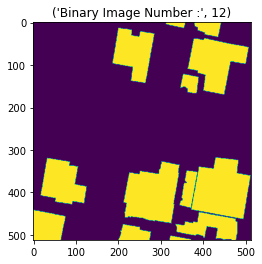

In [137]:
import glob as glob
PNG = glob.glob(r"D:\semantic segmentation\2.Image part\Binary Mask\mask*.png")
n = np.random.randint(0,20)
img_png = Image.open(PNG[n])
plt.imshow(img_png)
image_number = ('Binary Image Number :',n)
plt.title(image_number)

    